In [1]:
import pandas as pd

store = pd.HDFStore('../storage/encode_fantom_stats.hdf')

In [2]:
store.keys()

['/overlap_hg19_DNase_H3K27ac_immortalized_cell_line',
 '/overlap_hg19_DNase_H3K27ac_in_vitro_differentiated_cells',
 '/overlap_hg19_DNase_H3K27ac_induced_pluripotent_stem_cell_line',
 '/overlap_hg19_DNase_H3K27ac_primary_cell',
 '/overlap_hg19_DNase_H3K27ac_stem_cell',
 '/overlap_hg19_DNase_H3K27ac_tissue',
 '/reldist_hg19_DNase_H3K27ac_immortalized_cell_line',
 '/reldist_hg19_DNase_H3K27ac_in_vitro_differentiated_cells',
 '/reldist_hg19_DNase_H3K27ac_induced_pluripotent_stem_cell_line',
 '/reldist_hg19_DNase_H3K27ac_primary_cell',
 '/reldist_hg19_DNase_H3K27ac_stem_cell',
 '/reldist_hg19_DNase_H3K27ac_tissue']

In [3]:
store.close()

## Stem Cell

In [5]:
stem_ovlp_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'overlap_hg19_DNase_H3K27ac_stem_cell')

In [10]:
stem_ovlp_df.T

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
biosample_name,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,...,H9,H9,H9,H9,H9,H9,H9,H9,H9,H9
biosample_type,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,...,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
encyclopedia_size,46114,46114,46114,46114,46114,46114,46114,46114,46114,46114,...,42494,42494,42494,42494,42494,42494,42494,42494,42494,42494
fisher_left_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1565e-76,7.6942e-82,7.7325e-90,4.3002e-95,6.431e-100,3.0978e-104,3.2658e-107,4.7283e-111,1.2607e-112,1.4293e-122
fisher_oddsratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.275,0.256,0.228,0.214,0.197,0.184,0.175,0.165,0.161,0.135
fisher_right_p,1,1,1,1,1,1,1,1,1,1.4398e-305,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758e-76,1.7774e-81,1.3718e-89,2.0668e-94,1.4133e-99,6.0564e-104,5.6046e-107,8.1004e-111,2.572e-112,2.5464e-122
jaccard,0.0210103,0.0195629,0.0175488,0.0152994,0.0135582,0.0119691,0.0107731,0.00964203,0.00861837,0.00781655,...,0.000735889,0.000650425,0.000527816,0.000500154,0.000455274,0.000409276,0.000389758,0.000371538,0.000363844,0.000305179
min_ovlp,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95


In [28]:
stem_ovlp_df['biosample_name'].unique()

array(['neuronal stem cell', 'H1-hESC', 'H9'], dtype=object)

In [8]:
import seaborn as sns
%matplotlib inline

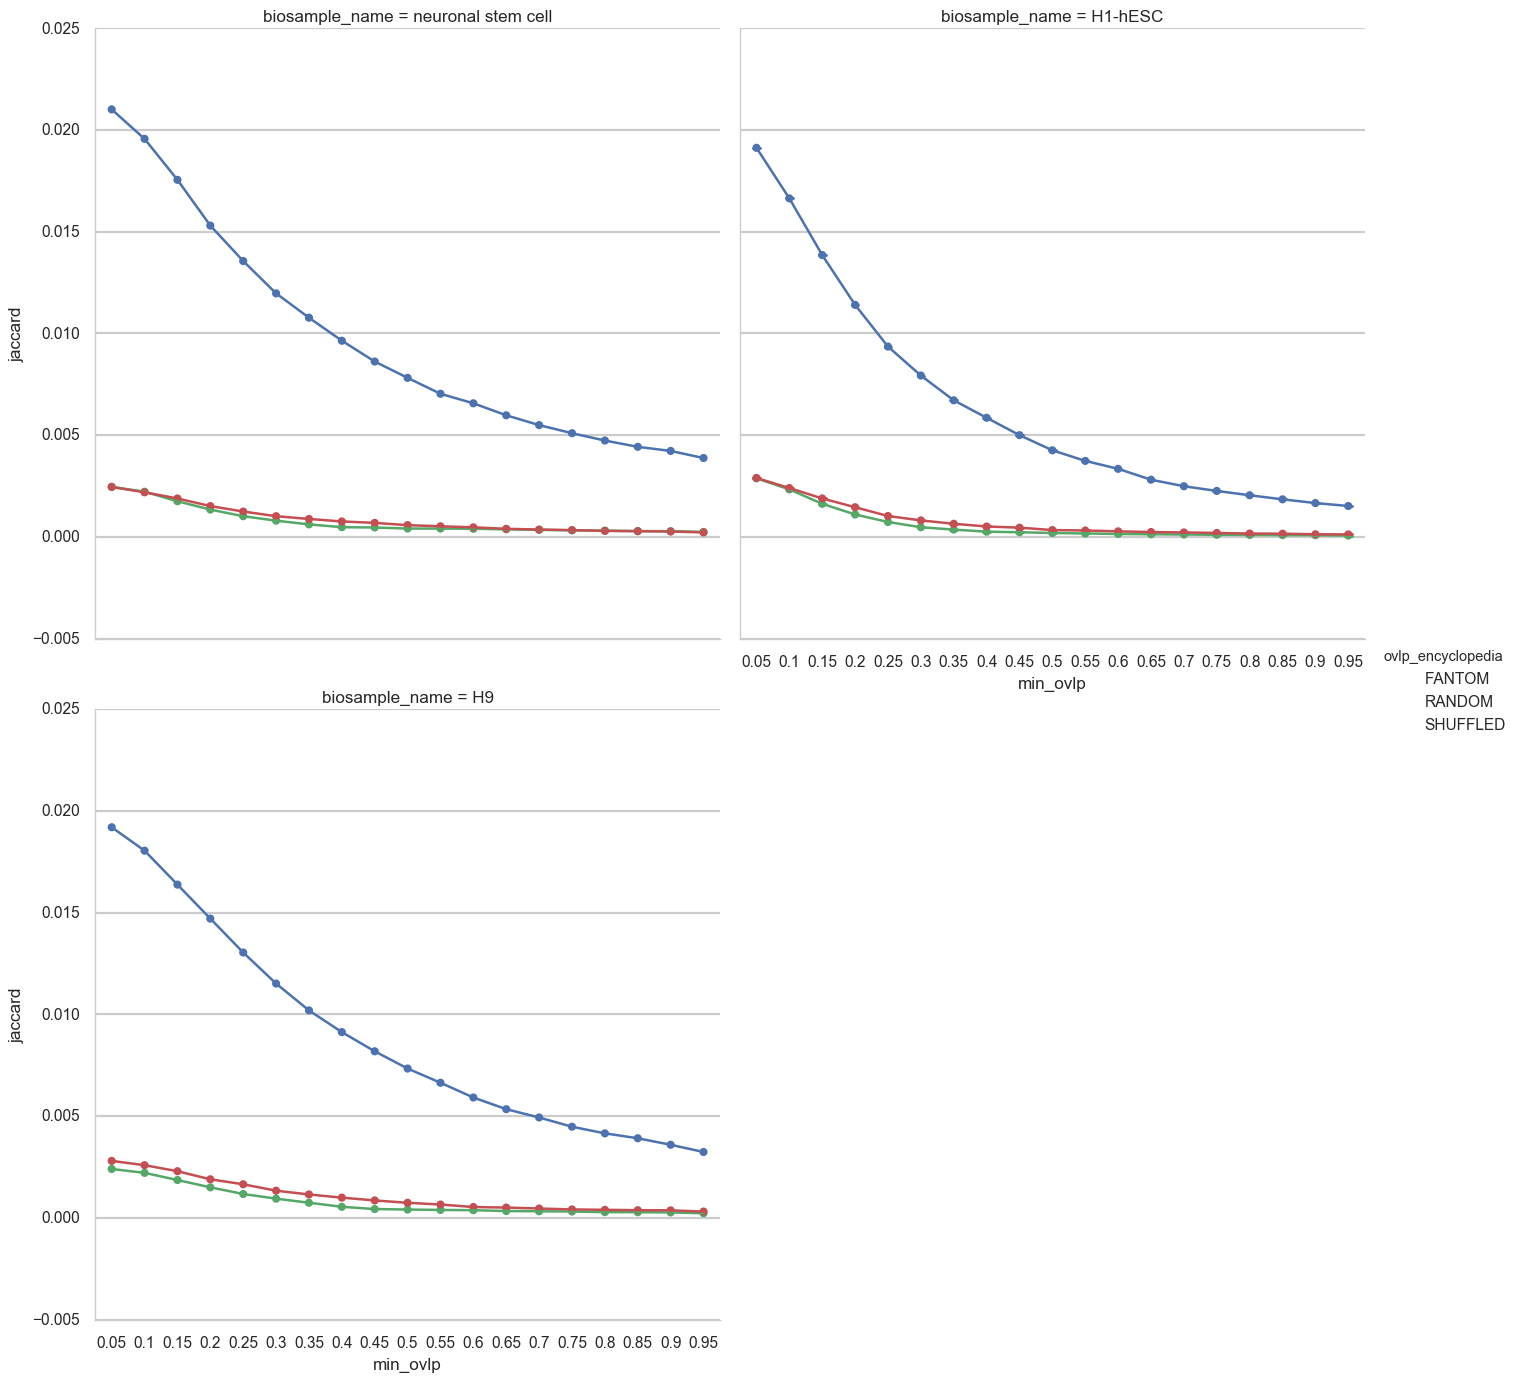

In [58]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.7, rc={"lines.linewidth": 1})

g = sns.FacetGrid(stem_ovlp_df, col="biosample_name", hue="ovlp_encyclopedia", col_wrap=2, size=7)
g.map(sns.pointplot, "min_ovlp", "jaccard", capsize=.2, size=6, aspect=1)
g.add_legend();


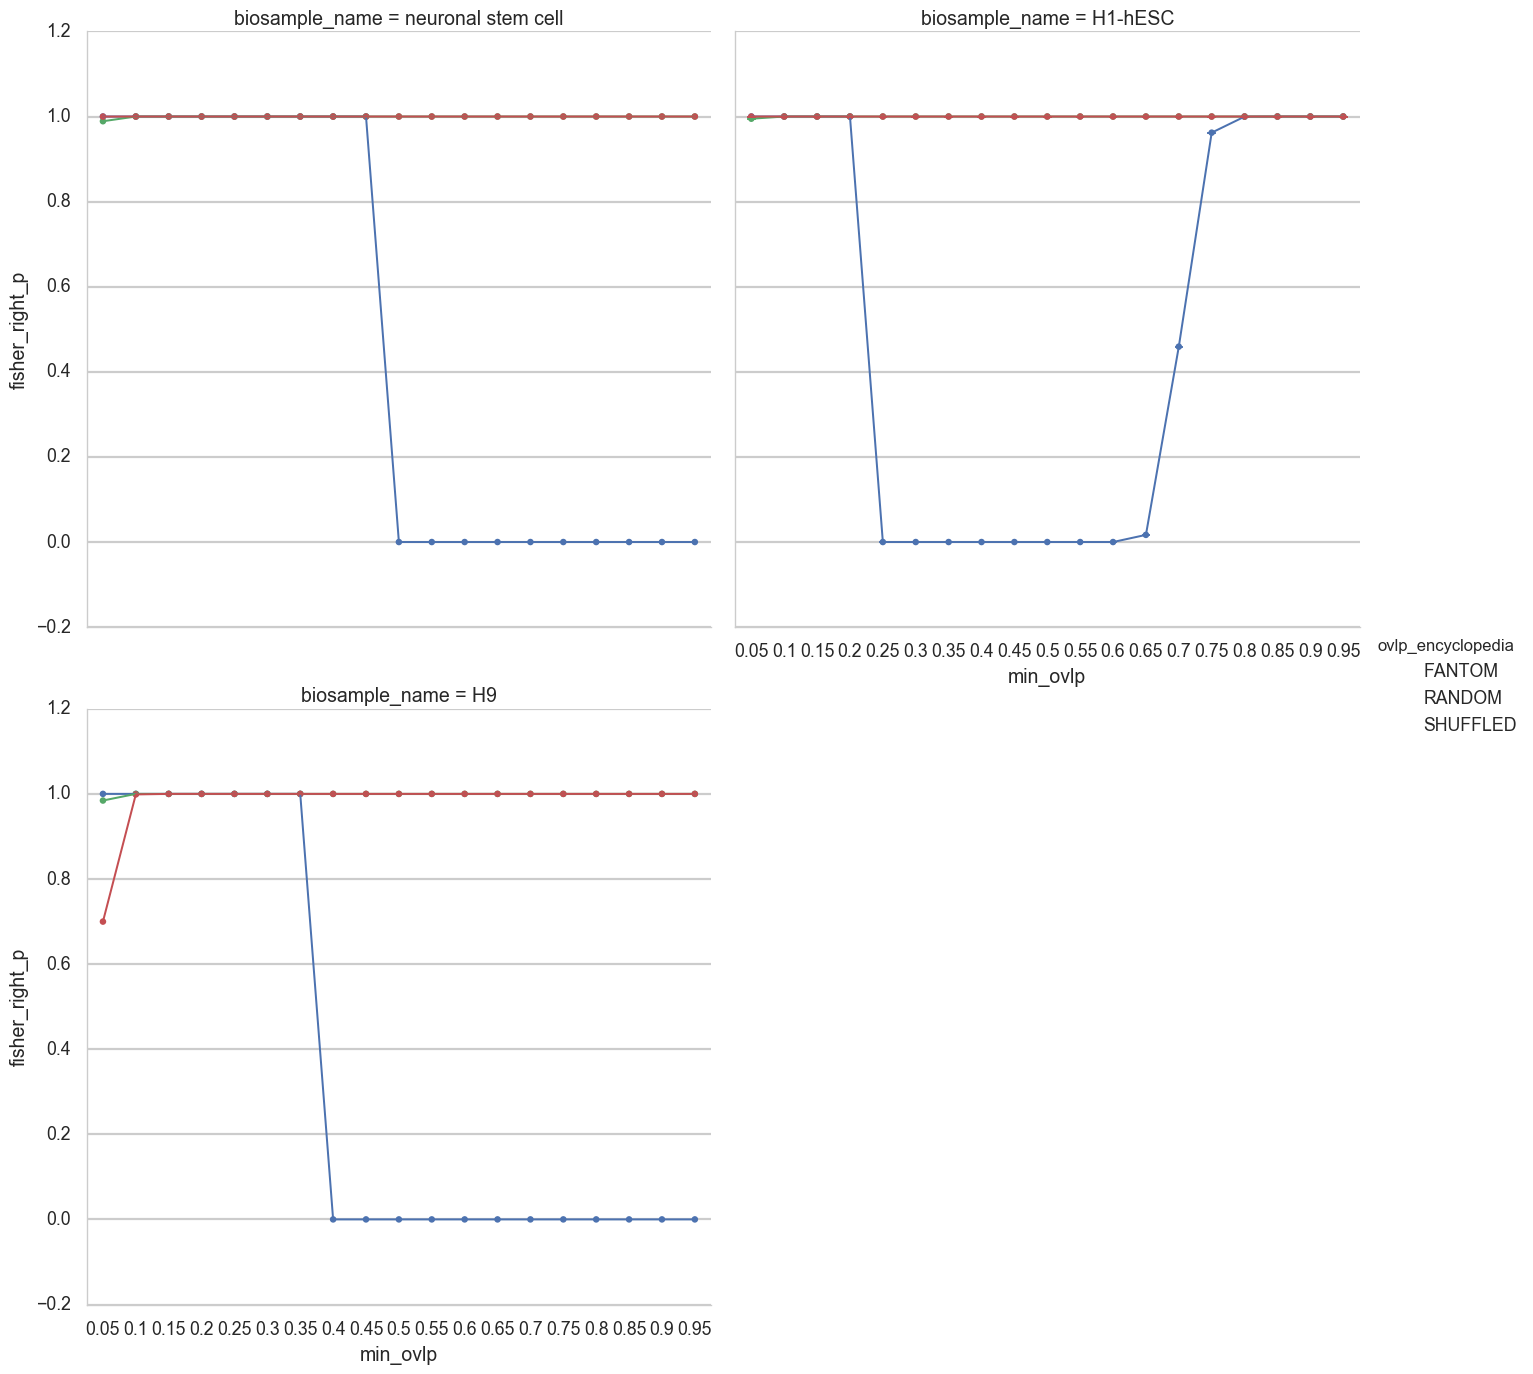

In [55]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})

g = sns.FacetGrid(stem_ovlp_df, col="biosample_name", hue="ovlp_encyclopedia", col_wrap=2, size=7)
g.map(sns.pointplot, "min_ovlp", "fisher_right_p", capsize=.2, size=6, aspect=1)
g.add_legend();


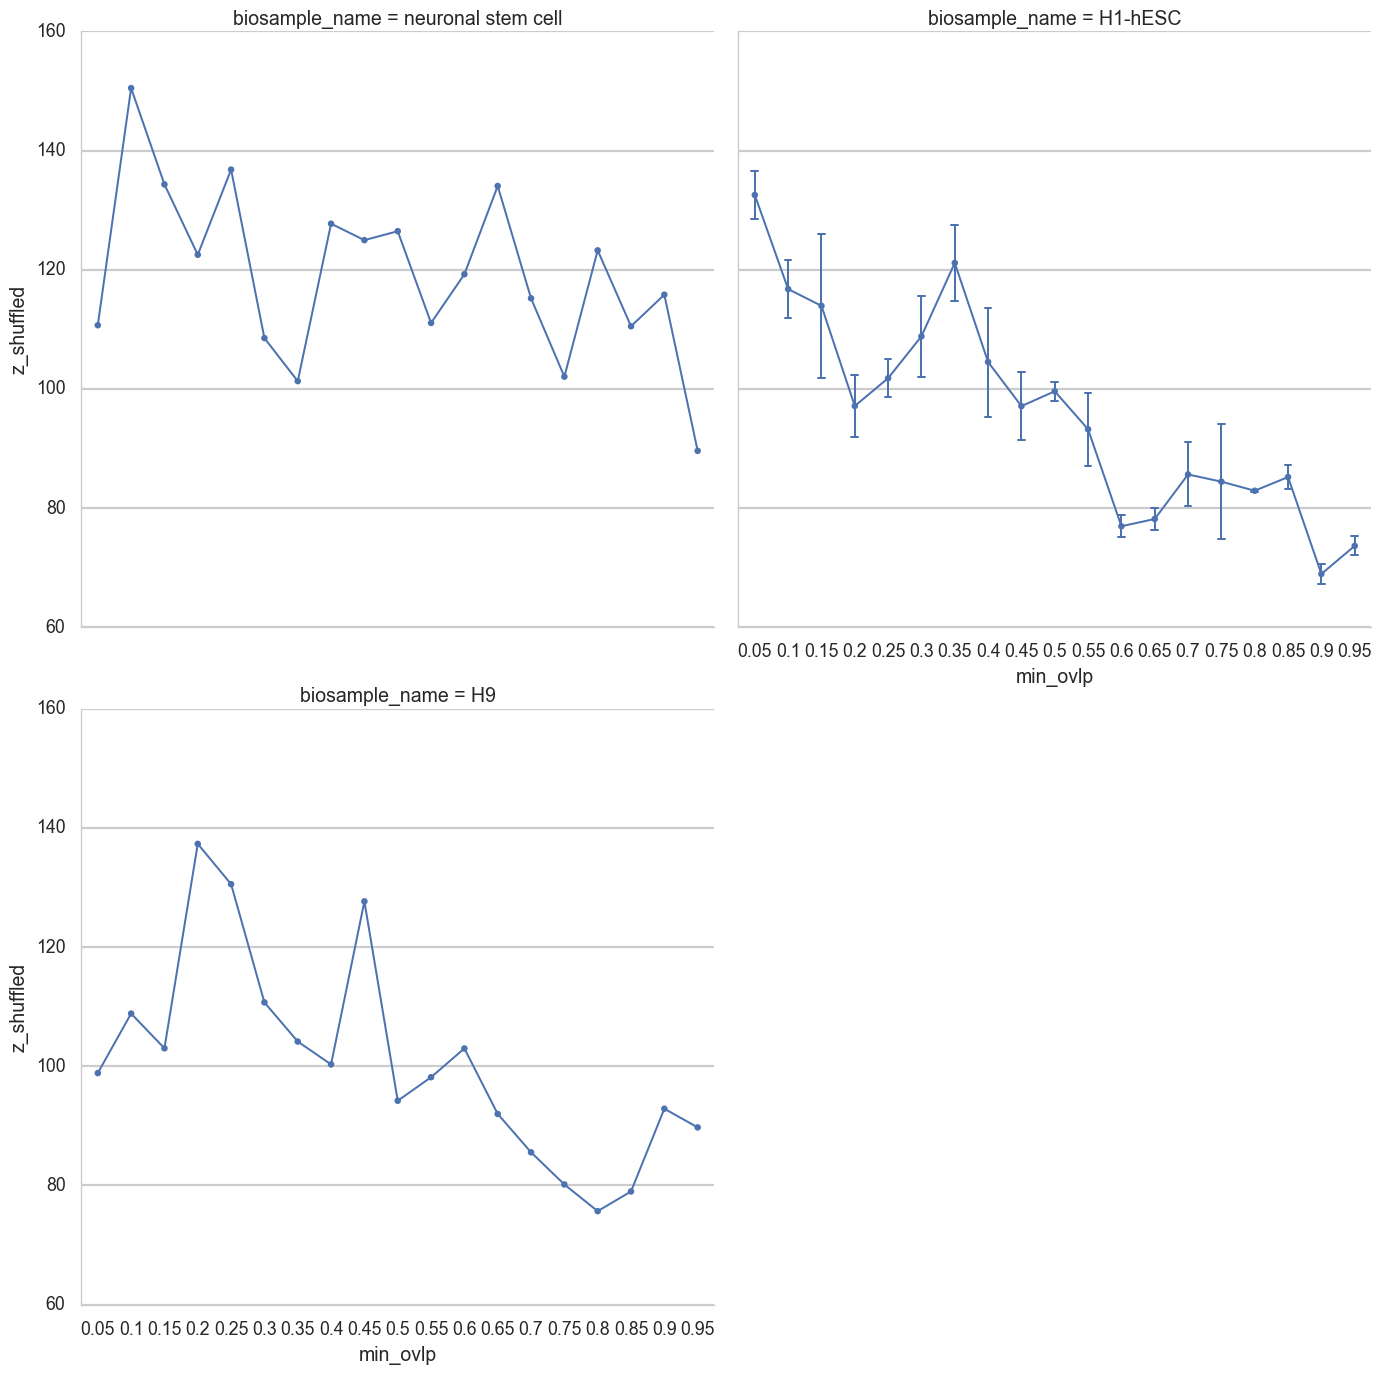

In [50]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})

g = sns.FacetGrid(stem_ovlp_df, col="biosample_name", col_wrap=2, size=7)
g.map(sns.pointplot, "min_ovlp", "z_shuffled", capsize=.2, size=6, aspect=1)
g.add_legend();

In [45]:
stem_reldist_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'reldist_hg19_DNase_H3K27ac_stem_cell')

In [46]:
stem_reldist_df.T

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_type,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,...,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell,stem cell
biosample_name,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,neuronal stem cell,...,H9,H9,H9,H9,H9,H9,H9,H9,H9,H9
ovlp_encyclopedia,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,...,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED,SHUFFLED
encyclopedia_size,46114,46114,46114,46114,46114,46114,46114,46114,46114,46114,...,42494,42494,42494,42494,42494,42494,42494,42494,42494,42494
ovlp_encyclopedia_size,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011,...,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011
reldist,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49
ovlp_count,3226,1713,1436,1246,1118,1126,1012,973,1017,932,...,886,880,811,789,829,834,804,825,897,794
ovlp_fraction,0.07,0.037,0.031,0.027,0.024,0.024,0.022,0.021,0.022,0.02,...,0.021,0.021,0.019,0.019,0.02,0.02,0.019,0.019,0.021,0.019


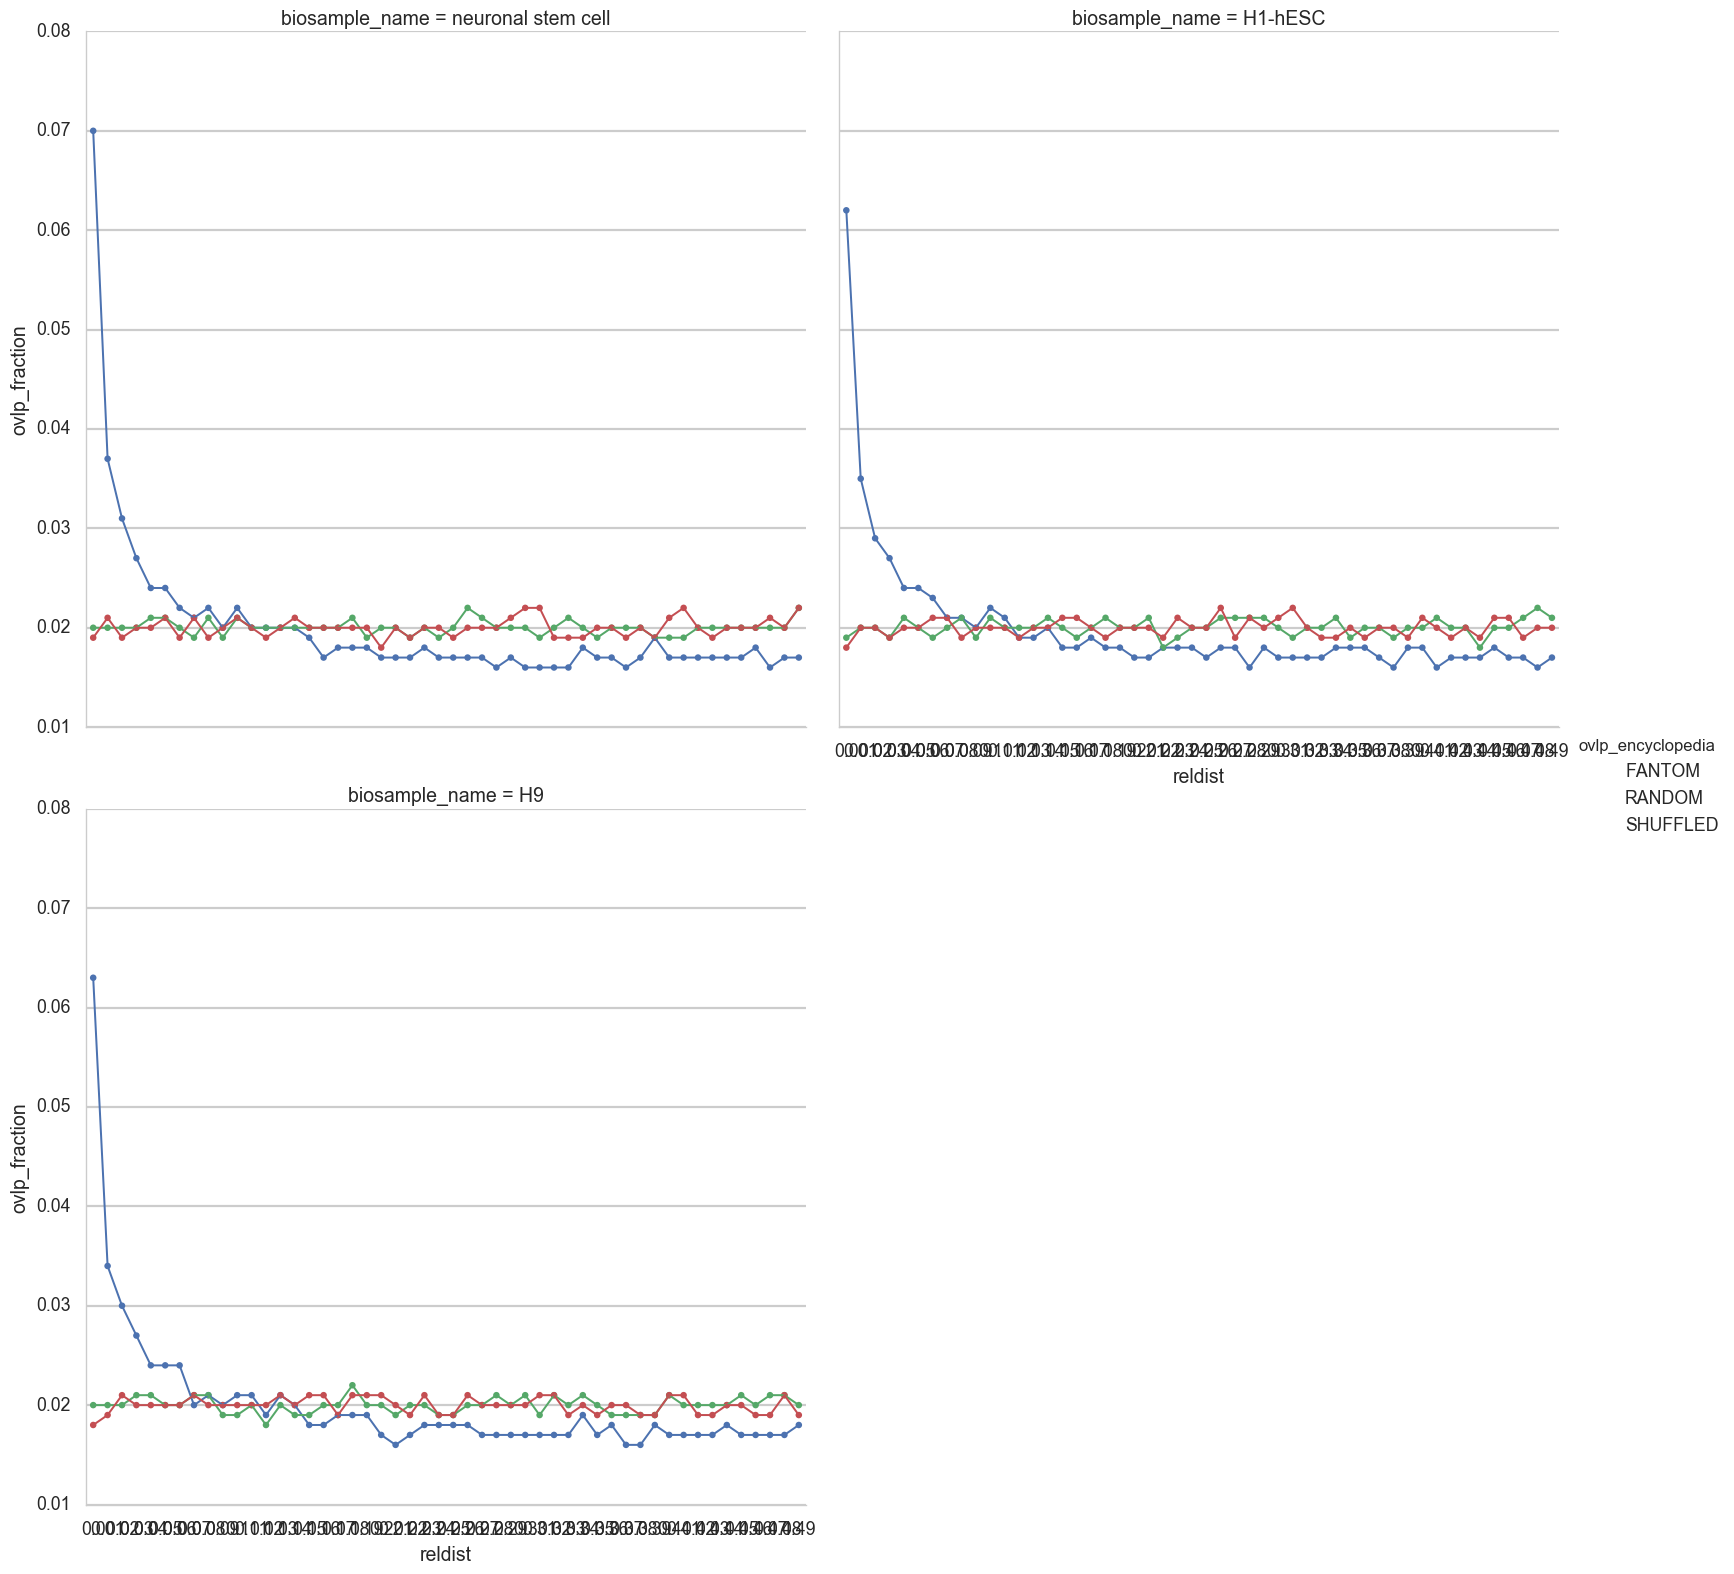

In [48]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})

g = sns.FacetGrid(stem_reldist_df, col="biosample_name", hue="ovlp_encyclopedia", col_wrap=2, size=8)
g.map(sns.pointplot, "reldist", "ovlp_fraction", capsize=.2, size=6, aspect=1)
g.add_legend();